# 线性回归

## 技术指标

### 相对强弱指标 RSI

RSI是根据一定时期内上涨和下跌幅度之和的比率制作的技术曲线，分析市场买沽盘的意向和实力, 得到未来市场的走势。计算公式如下：  
**`RSI(n) = n日内收盘价涨数平均值 / (n日内收盘价涨数平均值 + n日内收盘价跌幅平均值)*100`**

### 移动平均线 MA

MA是将一段时期内的股票价格平均值连成曲线, 以显示股价的历史波动情况, 反映股价指数未来发展趋势。计算公式如下：  
**`MA(N) = (第1天收盘价 + 第2天收盘价 + …… + 第N天收盘价)/N`**

### 顺势指标CCI

衡量股价是否超出常态分布范围，引入了价格与固定期间的股价平均区间的偏离程度的概念, 强调股价平均绝对偏差在股市技术分析中的重要性。计算公式如下：  
**`CCI(N)=(TP－MA(N))÷MD÷0.015`**，其中：TP =(最高价+最低价+收盘价)/3；MD = 最近N日(MA － 收盘价)的累计之和/N

## 数据处理

指标我们选取**RSI(5)、MA(5)、CCI(5)作为自变量**

### 获取数据（tushare）

In [127]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import talib
import warnings
import datetime
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 15, 5
%matplotlib inline

In [122]:
# 选取2018-07-02到2018-08-20的数据，保证07-02具有CCI(5)、RSI(5)值
#df = ts.get_hist_data('002639',start = '2018-06-26',end = '2018-08-20')
#with pd.ExcelWriter('../data/non_data.xlsx') as writer:
#    df.to_excel(writer)
df = pd.read_excel('../data/non_data.xlsx')
data = df[['close','high','low','p_change','ma5']]
data.sort_index(inplace=True,ascending=False)
data.reset_index(inplace=True,drop=True)
data.head(10)

,close,high,low,p_change,ma5
0,6.30,6.42,6.23,-0.63,6.410
1,6.32,6.33,6.15,0.32,6.374
2,6.31,6.33,6.25,-0.16,6.336
3,6.30,6.37,6.28,-0.16,6.314
4,6.44,6.46,6.27,2.22,6.334
5,6.36,6.45,6.34,-1.24,6.346
6,6.39,6.39,6.27,0.47,6.360
7,6.31,6.39,6.25,-1.25,6.360
8,6.17,6.30,6.11,-2.22,6.334
9,6.36,6.79,6.24,3.08,6.318


### 求解RSI(5)和CCI(5)

In [123]:
# RSI(n) = n日内收盘价涨数平均值 / (n日内收盘价涨数平均值 + n日内收盘价跌幅平均值)*100
data['rsi5'] = talib.RSI(np.array(df['close']), timeperiod=5)
data.head(10)

,close,high,low,p_change,ma5,rsi5
0,6.30,6.42,6.23,-0.63,6.410,NaN
1,6.32,6.33,6.15,0.32,6.374,NaN
2,6.31,6.33,6.25,-0.16,6.336,NaN
3,6.30,6.37,6.28,-0.16,6.314,NaN
4,6.44,6.46,6.27,2.22,6.334,NaN
5,6.36,6.45,6.34,-1.24,6.346,78.947368
6,6.39,6.39,6.27,0.47,6.360,80.246914
7,6.31,6.39,6.25,-1.25,6.360,84.905660
8,6.17,6.30,6.11,-2.22,6.334,62.042223
9,6.36,6.79,6.24,3.08,6.318,64.436371


In [124]:
# CCI(N)=(TP－MA(N))÷MD÷0.015
# TP =(最高价+最低价+收盘价)/3；MD = 最近N日(MA － 收盘价)的累计之和/N
data['cci5'] = talib.CCI(np.array(df['high']),np.array(df['low']),np.array(df['close']), timeperiod=5)
data.head(10)

,close,high,low,p_change,ma5,rsi5,cci5
0,6.30,6.42,6.23,-0.63,6.410,NaN,NaN
1,6.32,6.33,6.15,0.32,6.374,NaN,NaN
2,6.31,6.33,6.25,-0.16,6.336,NaN,NaN
3,6.30,6.37,6.28,-0.16,6.314,NaN,NaN
4,6.44,6.46,6.27,2.22,6.334,NaN,100.000000
5,6.36,6.45,6.34,-1.24,6.346,78.947368,44.354839
6,6.39,6.39,6.27,0.47,6.360,80.246914,115.384615
7,6.31,6.39,6.25,-1.25,6.360,84.905660,114.035088
8,6.17,6.30,6.11,-2.22,6.334,62.042223,-37.974684
9,6.36,6.79,6.24,3.08,6.318,64.436371,-73.476703


## 绘制散点图

In [125]:
data = data[5:]
data.reset_index(inplace=True,drop=True)
data.head()

,close,high,low,p_change,ma5,rsi5,cci5
0,6.36,6.45,6.34,-1.24,6.346,78.947368,44.354839
1,6.39,6.39,6.27,0.47,6.360,80.246914,115.384615
2,6.31,6.39,6.25,-1.25,6.360,84.905660,114.035088
3,6.17,6.30,6.11,-2.22,6.334,62.042223,-37.974684
4,6.36,6.79,6.24,3.08,6.318,64.436371,-73.476703


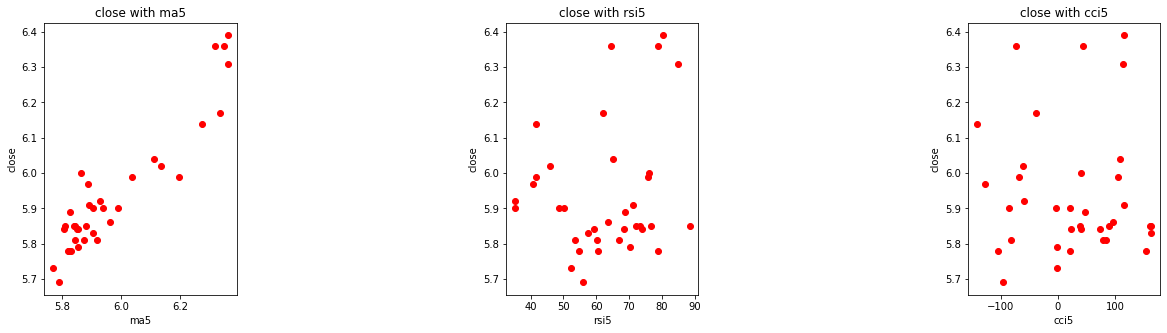

In [126]:
y = list(data['close'])
i = 1
plt.figure(facecolor='white',figsize=(20,5))
for index in ['ma5','rsi5','cci5']:
    x = list(data[index])
    plt.subplot(1,5,i)
    plt.xlabel(index)
    plt.ylabel('close')
    plt.title('close with ' + index)
    plt.plot(x,y,'or')
    i = i + 2

## 使用多元线性回归

In [130]:
model = LinearRegression(fit_intercept=True)
indicators = ['ma5','rsi5','cci5']
X = data[indicators]
y = data['close']
model.fit(X,y)
predict_close = model.predict(X)
predict_close

array([6.3072882 , 6.30690645, 6.32049094, 6.26755556, 6.26853791,
       6.18049632, 6.0932781 , 6.05310337, 6.04623126, 6.01323271,
       5.91718141, 5.91535248, 5.89185443, 5.83169407, 5.82305243,
       5.87988202, 5.83670091, 5.82719303, 5.84031151, 5.87498496,
       5.83194717, 5.87203138, 5.88409153, 5.8637571 , 5.81018616,
       5.82278975, 5.83835825, 5.78500262, 5.82384821, 5.8510242 ,
       5.8480091 , 5.85412878, 5.82667804, 5.81565286, 5.78940563,
       5.73776116])

In [1]:
data['predict'] = predict_close
plt.title('')
data[['close','predict']].plot(alpha=0.5)

NameError: name 'predict_close' is not defined

```python
# RSI(n) = n日内收盘价涨数平均值 / (n日内收盘价涨数平均值 + n日内收盘价跌幅平均值)*100
data['rsi5'] = None
for i in range(4,40):
    sum1 = 0.0
    sum2 = 0.0
    count = 0
    for j in range(i-4,i+1):
        xx = data.at[j,'p_change']
        if xx >= 0:
            sum1 += xx
            count += 1
        else:
            sum2 += xx
    data.at[i,'rsi5'] = (sum1/count)*100/(((sum1/count)+sum2/(5-count)))
data.head(10)
```

```python
# CCI(N)=(TP－MA(N))÷MD÷0.015
# TP =(最高价+最低价+收盘价)/3；MD = 最近N日(MA － 收盘价)的累计之和/N
data['cci5'] = None
for i in range(4,40):
    tp = (data.at[i,'high'] + data.at[i,'close'] + data.at[i,'low'])/3
    ma = data.at[i,'ma5']
    md = 0.0
    for j in range(i-4,i+1):
        md += ma - data.at[i,'close']
    md /= 5
    data.at[i,'cci5'] = (tp - ma)/md/0.015
data.head(10)
```

In [104]:
# 归一化处理
#def normalization(data):
#    _range = np.max(data) - np.min(data)
#    return (data - np.min(data)) / _range
#for column in data.columns:
#    data[column] = normalization(data[column])
#data.head()

,close,high,low,p_change,ma5,rsi5,cci5
0,0.957143,0.666667,1.000000,0.339450,0.976271,0.170175,0.151515
1,1.000000,0.607843,0.910256,0.600917,1.000000,0.169657,0.369697
2,0.885714,0.607843,0.884615,0.337920,1.000000,0.180209,0.282424
3,0.685714,0.519608,0.705128,0.189602,0.955932,0.107091,0.283075
4,0.957143,1.000000,0.871795,1.000000,0.928814,0.227455,0.0937951
